# Exercício 2 - Seção 5.6

Rafael Ragozoni Conrado 290268

In [375]:
import pandas as pd
import numpy as np
from plotnine import *

In [376]:
galton_df = pd.read_csv("Galton.csv")
mytheme = theme(aspect_ratio=0.2, figure_size=(20,4)
             , text= element_text(colour = "white", face = "bold") 
             , strip_text = element_text(colour = "black", face = "bold") 
             )
galton_df.head()

,rownames,family,father,mother,sex,height,nkids
0,1,1,78.5,67.0,M,73.2,4
1,2,1,78.5,67.0,F,69.2,4
2,3,1,78.5,67.0,F,69.0,4
3,4,1,78.5,67.0,F,69.0,4
4,5,2,75.5,66.5,M,73.5,4


#### (a) gráficos de distribuição de frequência das alturas dos pais e das crianças para avaliar o grau de simitria das distrituições.

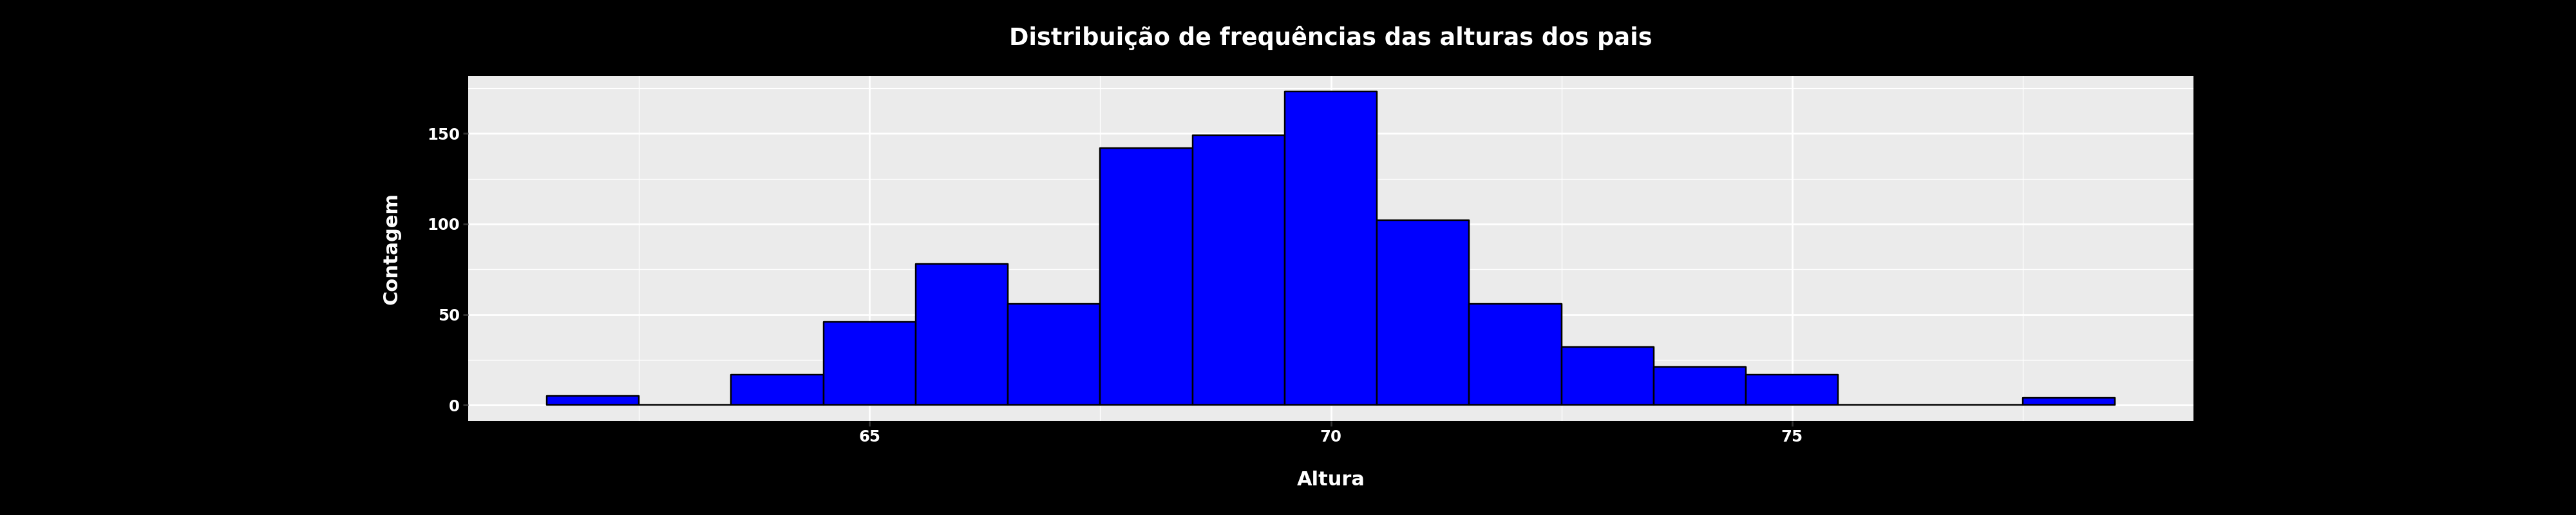

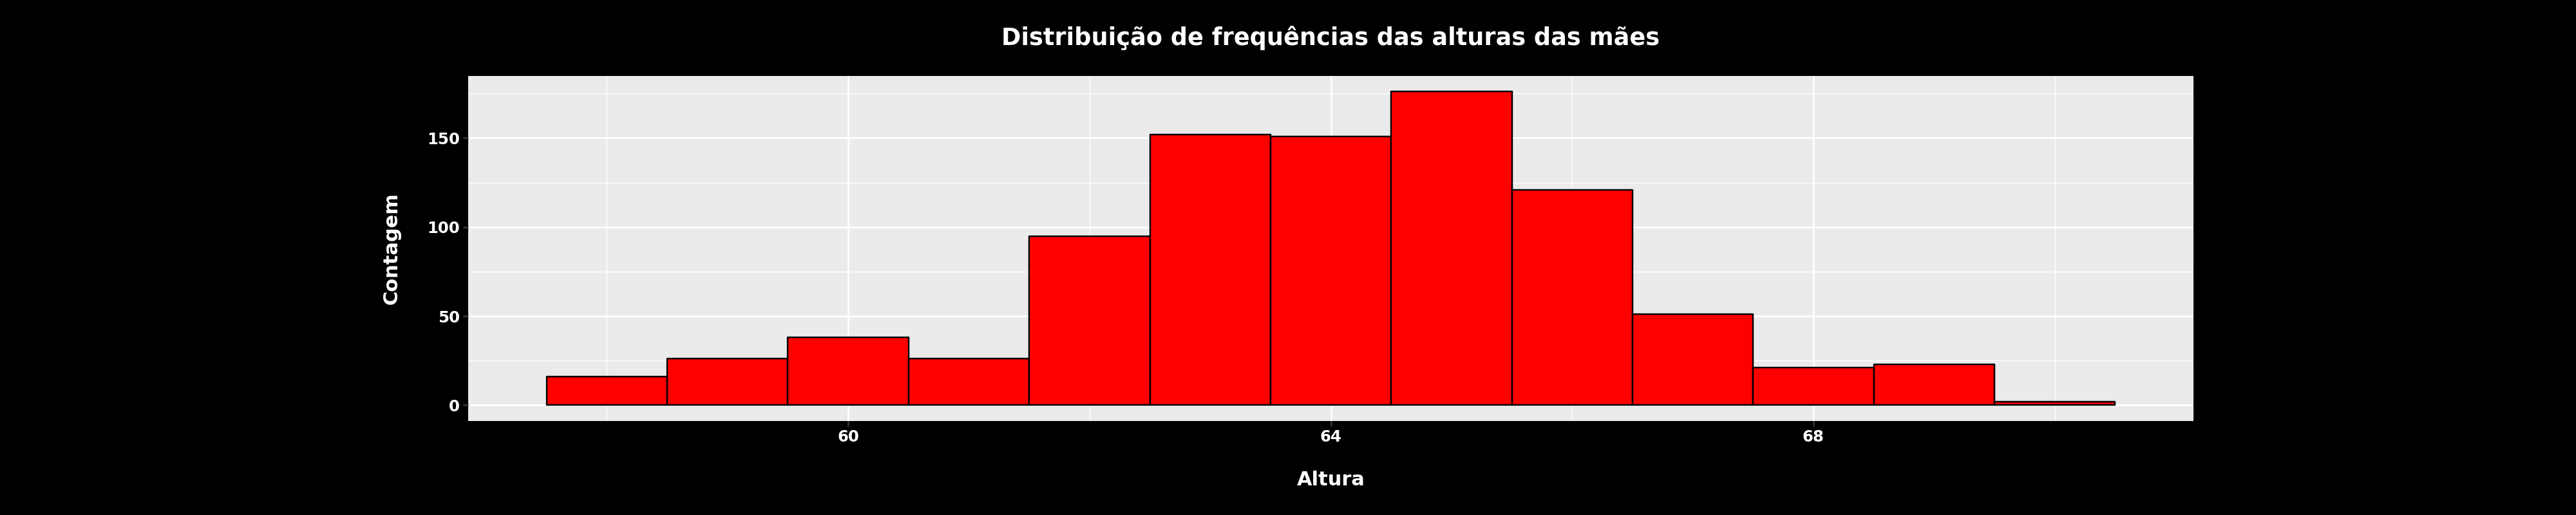

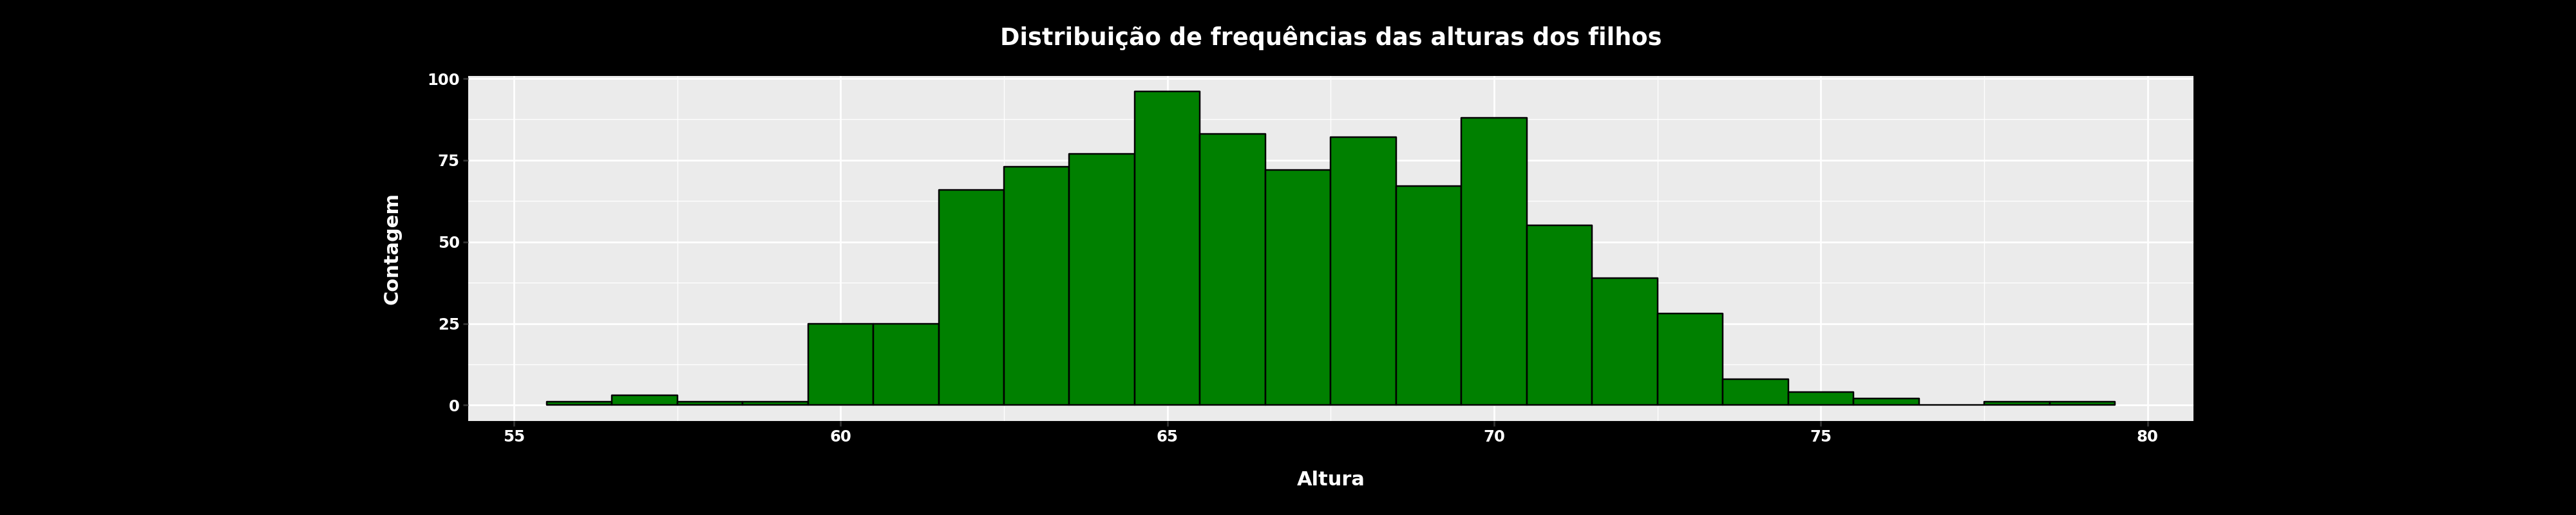

In [377]:
father_height_dist = ggplot(galton_df) \
    + aes(x="father") \
    + geom_histogram(binwidth=1, fill="blue", color="black") \
    + labs(title='Distribuição de frequências das alturas dos pais', x='Altura', y='Contagem') \
    + mytheme
father_height_dist.show()
mother_height_dist = ggplot(galton_df) \
    + aes(x="mother") \
    + geom_histogram(binwidth=1, fill="red", color="black") \
    + labs(title='Distribuição de frequências das alturas das mães', x='Altura', y='Contagem') \
    + mytheme
mother_height_dist.show()
child_height_dist = ggplot(galton_df) \
    + aes(x="height") \
    + geom_histogram(binwidth=1, fill="green", color="black") \
    + labs(title='Distribuição de frequências das alturas dos filhos', x='Altura', y='Contagem') \
    + mytheme
child_height_dist.show()

#### (b)  Gráficos de distribuição acumulada de frequências das alturas das crianças e dos pais para determinar as medianas das duas distribuições

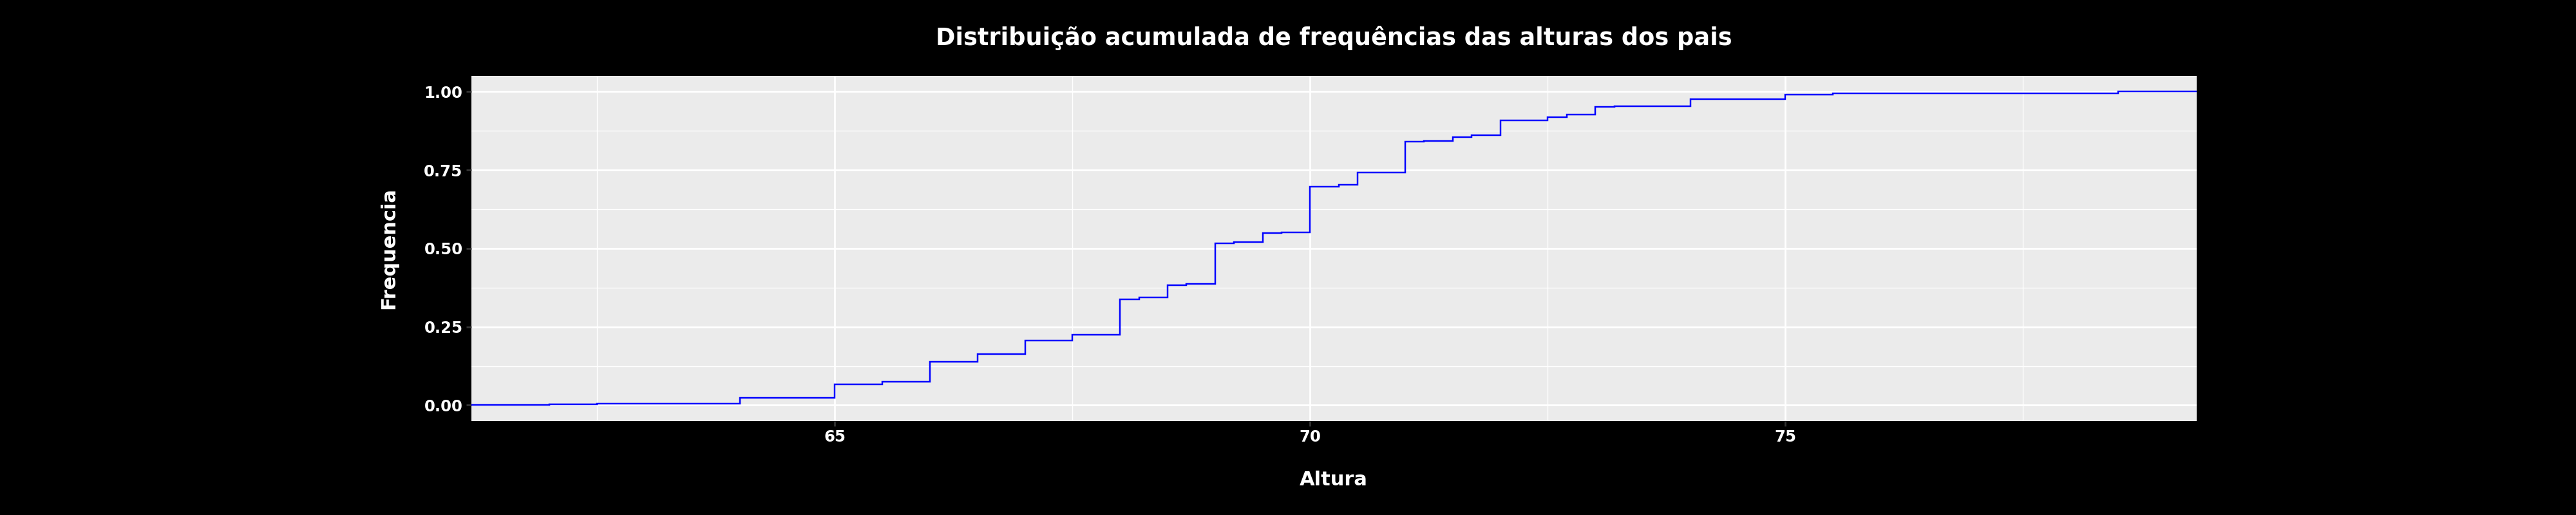

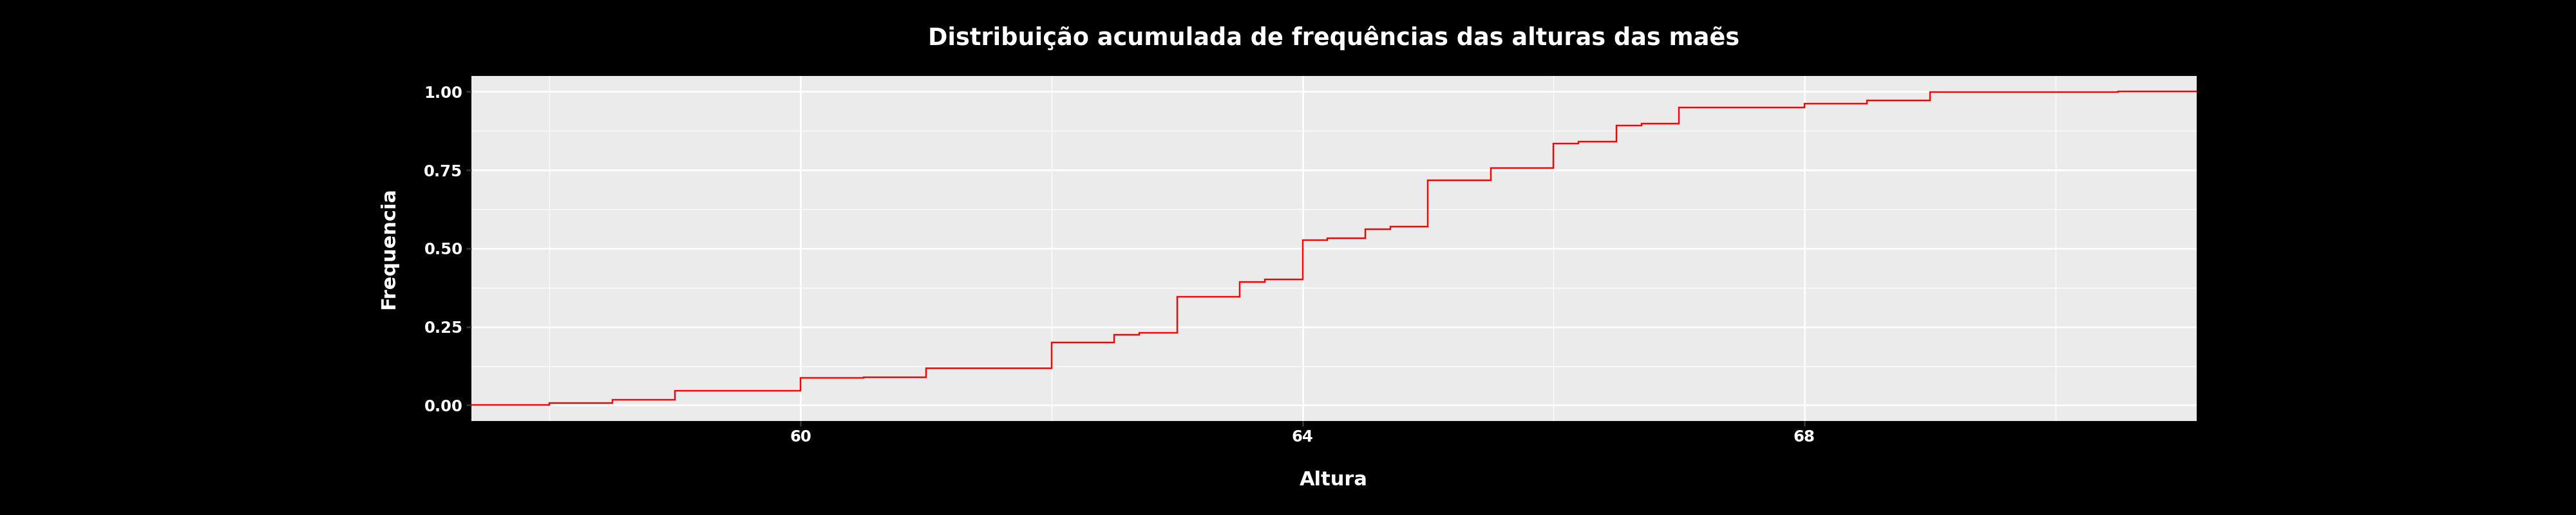

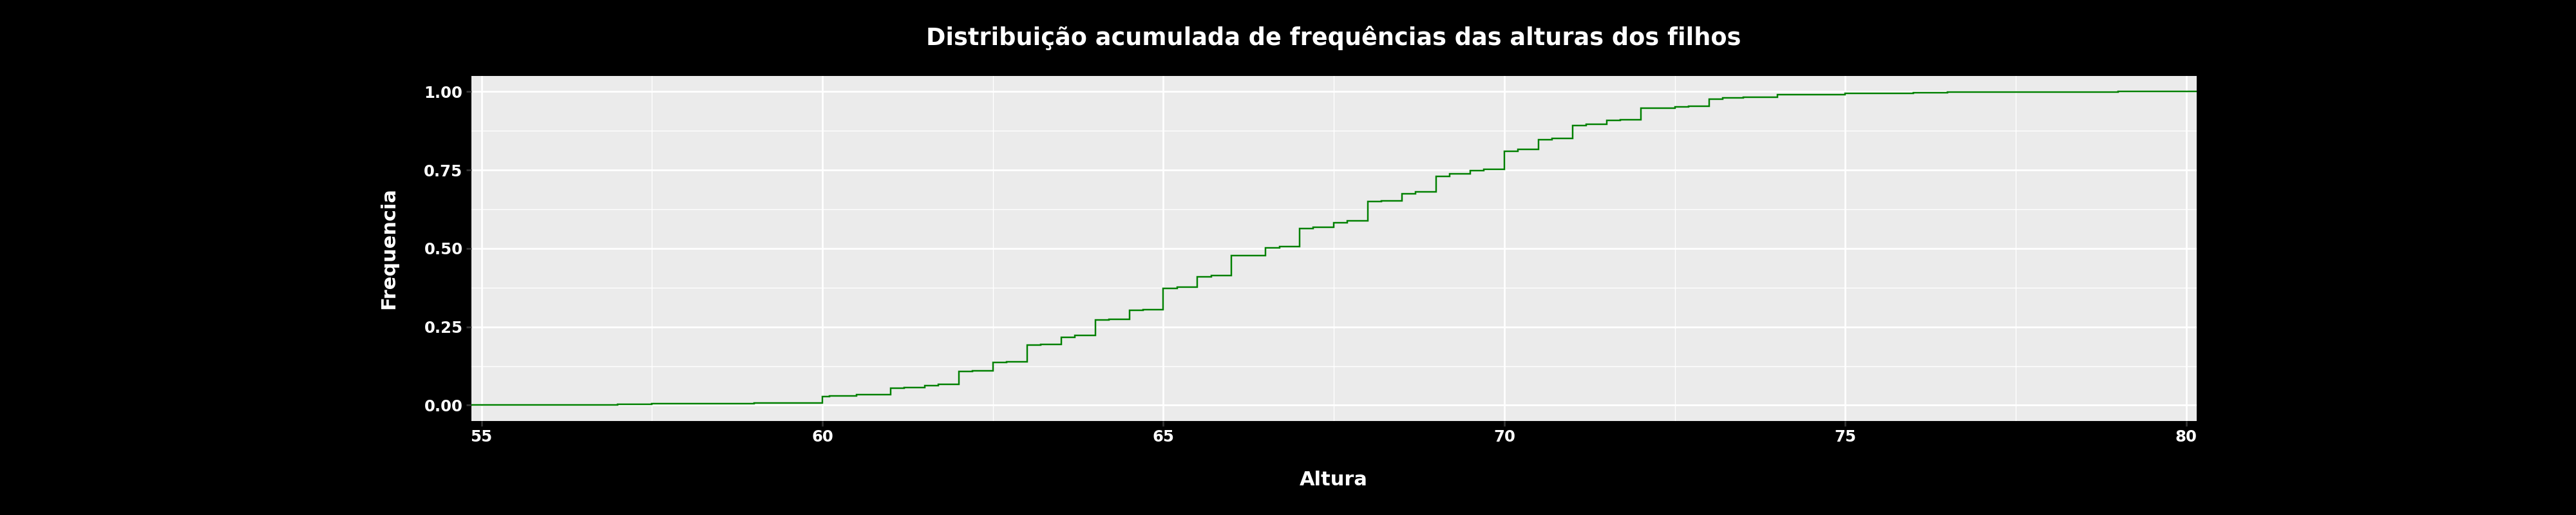

In [378]:
father_height_cdist = ggplot(galton_df) \
    + aes(x="father") \
    + stat_ecdf(geom = "step", color="blue") \
    + labs(title='Distribuição acumulada de frequências das alturas dos pais', x='Altura', y='Frequencia') \
    + mytheme
father_height_cdist.show()

mother_height_cdist = ggplot(galton_df) \
    + aes(x="mother") \
    + stat_ecdf(geom = "step", color="red") \
    + labs(title='Distribuição acumulada de frequências das alturas das maẽs', x='Altura', y='Frequencia') \
    + mytheme
mother_height_cdist.show()

child_height_cdist = ggplot(galton_df) \
    + aes(x="height") \
    + stat_ecdf(geom = "step", color="green") \
    + labs(title='Distribuição acumulada de frequências das alturas dos filhos', x='Altura', y='Frequencia') \
    + mytheme
child_height_cdist.show()

#### (c) Gráficos de caixa para comparar as estatísticas dos pais com as das crianças.

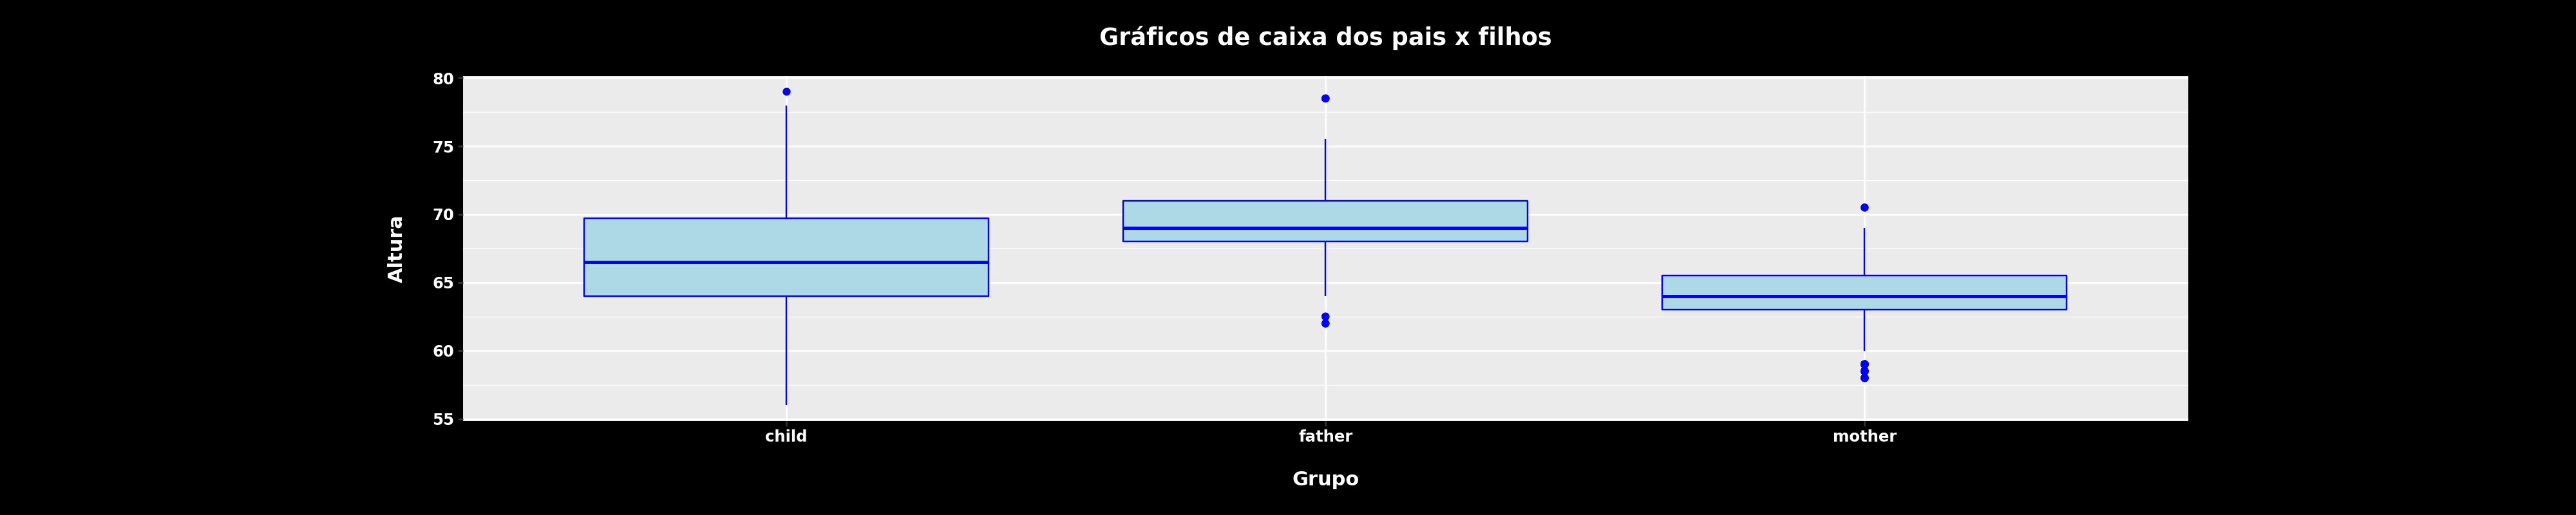

In [379]:
galton_long = pd.melt(galton_df, value_vars=['father', 'mother', 'height'], var_name='variable', value_name='value')
galton_long['variable'] = galton_long['variable'].replace({'height': 'child'})


family_box = ggplot(galton_long) \
    + aes(x="variable", y="value") \
    + geom_boxplot(fill="lightblue",color="blue") \
    + labs(title='Gráficos de caixa dos pais x filhos', x='Grupo', y='Altura') \
    + mytheme
family_box.show()

#### (d) Gráficos de quantil-quantil para verificar se a distribuição das alturas dos pais segue uma distribuição Gaussiana.

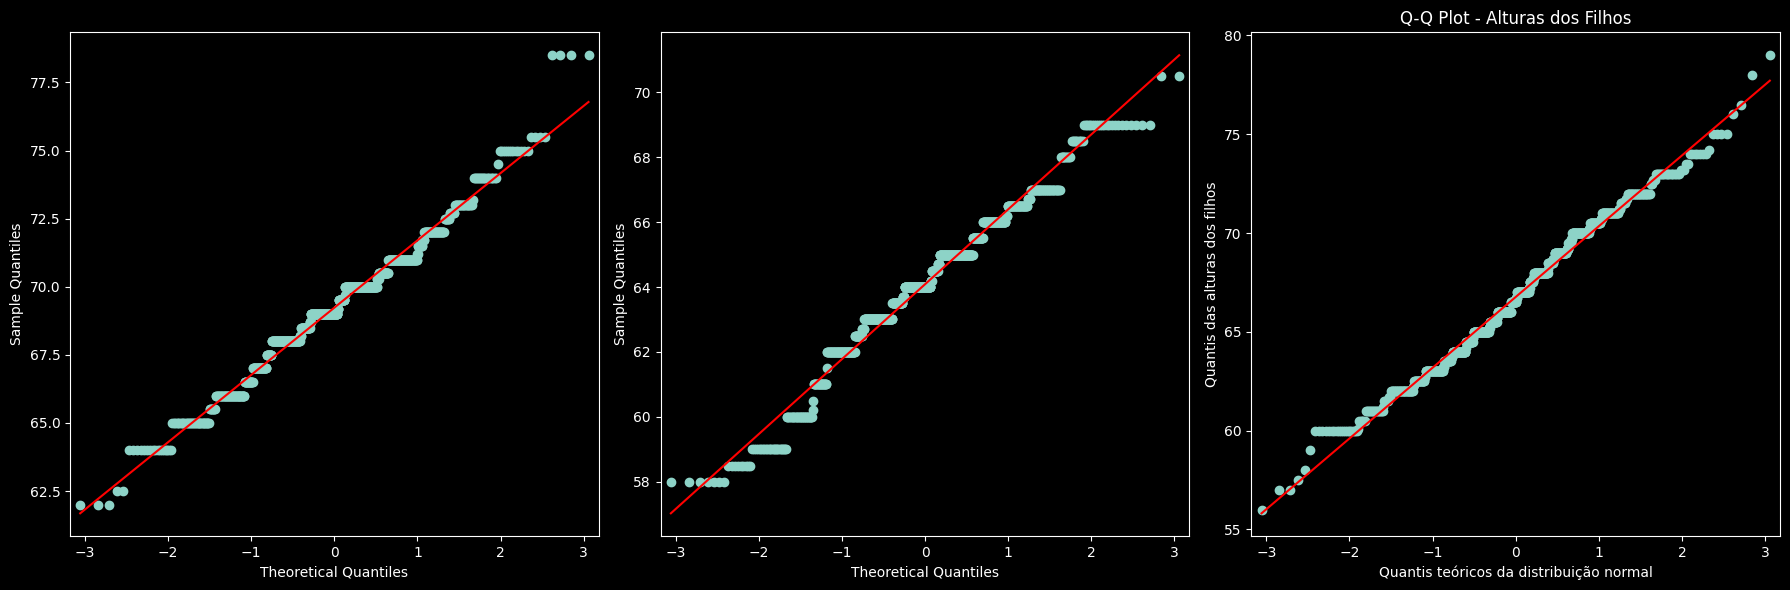

In [380]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
normal_quantiles = stats.norm.ppf(q=[0.01, 0.99])

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

qqplot(galton_df["father"], line ='s', ax=axs[0])
plt.title("Q-Q Plot - Alturas dos Pais")
plt.xlabel("Quantis teóricos da distribuição normal")
plt.ylabel("Quantis das alturas dos pais")

qqplot(galton_df["mother"], line ='s', ax=axs[1])
plt.title("Q-Q Plot - Alturas das Mães")
plt.xlabel("Quantis teóricos da distribuição normal")
plt.ylabel("Quantis das alturas das mães")

qqplot(galton_df["height"], line ='s', ax=axs[2])
plt.title("Q-Q Plot - Alturas dos Filhos")
plt.xlabel("Quantis teóricos da distribuição normal")
plt.ylabel("Quantis das alturas dos filhos")

plt.tight_layout()
plt.show()

#### (e) Gráfico de dispersão para verificar se há correlação entre as alturas das crianças e as alturas dos pais.

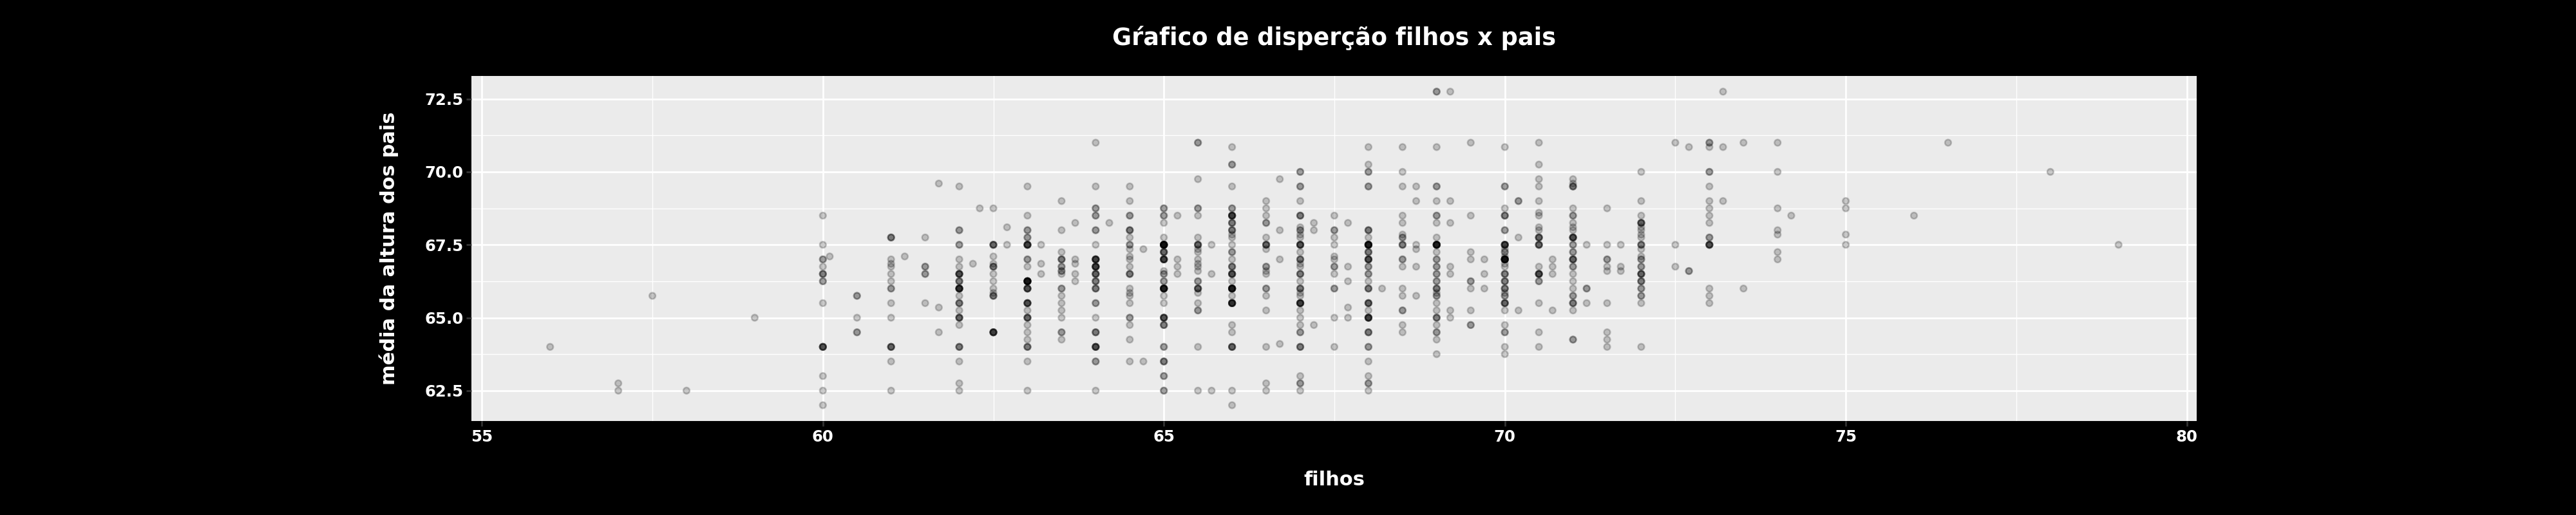

In [381]:
galton_df['parents_mean'] = (galton_df['father']+galton_df['mother'])/2

father_x_kid = ggplot(galton_df) \
    + aes(x='height', y='parents_mean') \
    + geom_point(alpha=0.2) \
    + labs(title='Gŕafico de disperção filhos x pais', x='filhos', y='média da altura dos pais') \
    + mytheme
father_x_kid

#### (f) Mapa de calor dos dados para identificar a quantidade de clusters subjacentes e comparar com a quantidade de grupos de pontos de dados mostrados no gráfico de dispersão no item 2e.

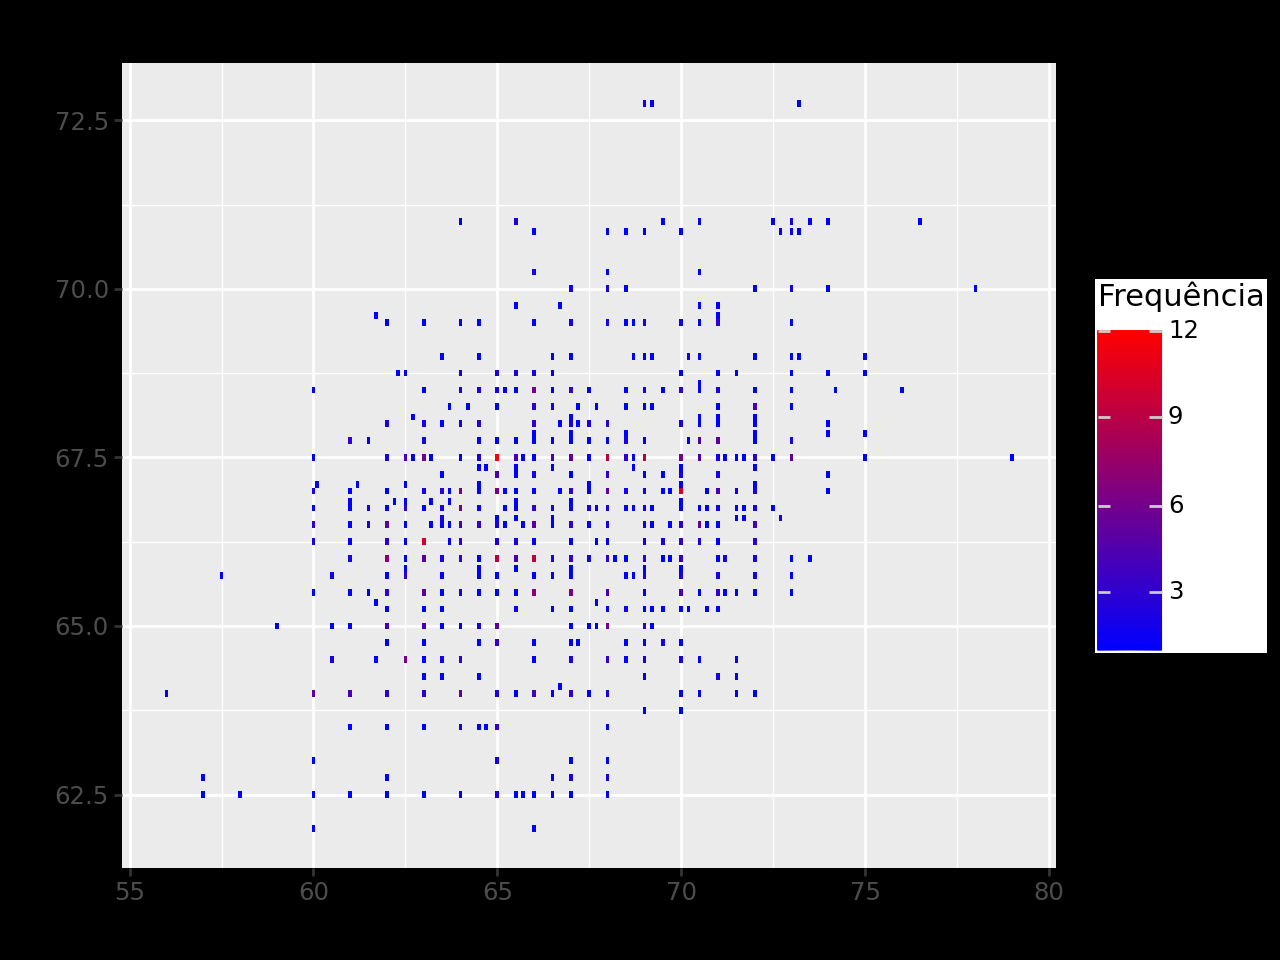

In [393]:
import seaborn as sns

# Calcular a matriz de correlação
galton_paisXfilho = galton_df[["height","parents_mean"]]
corr_matrix = galton_paisXfilho.corr()

# Criar o mapa de calor
galton_cluster = galton_paisXfilho.groupby(["height", "parents_mean"]).size().reset_index(name="count")

ggplot(galton_cluster, aes(x="height",y="parents_mean",fill="count")) \
+ geom_tile() \
+ labs(title="Mapa de Calor da Correlação", x="Altura dos Filhos", y="Média da altura dos Pais", fill="Frequência") \
+ scale_fill_gradient(low="blue", high="red") 


# Exercício 1 - Seção 6.5
Leia o texto em https://www.kaggle.com/code/evertonsilva/data-wrangling-cleaning e sintetize os principais passos de preparação de dados para aprendizado de máquina. Compare-os com os passos apresentados neste capítulo. 

Importação dos dados
- 1. Adquirir e checar o dataset

Organização e Estruturação de Dados
- Verificar valores faltantes
- Verificar valores duplicados
- Análise exploratória dos atributos (No geral é necessário ver os dados para entender o que precisa ser feito para utiliza-lo)
 
Transformação de Dados
- Verificar valores faltantes
- Verificar valores duplicados
  (Nesse caso os valores são checados e transformados para serem utilizados)
- Análise exploratória dos atributos (No geral é necessário ver os dados para entender o que precisa ser feito para utiliza-lo)


# Exercício 2 - Seção 6.5
Reproduza os exemplos fornecidos nos Capítulos 6, 7 e 8 em [90] (Python) ou nos Capítulos 9 a 16 em [91] (R). Em ambas as referências, são abordadas diversas funções adicionais de manipulação dos dados, além das apresentadas neste capítulo, proporcionando uma visão mais abrangente das capacidades das respectivas linguagens de programação.

#### 6.1 Reading and Writing Data in Text Format

In [9]:
!cat examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [10]:
df = pd.read_csv("examples/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
!cat examples/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [12]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("examples/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [13]:
!cat examples/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [14]:
!cat examples/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [15]:
result = pd.read_csv("examples/ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [16]:
 !cat examples/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [17]:
pd.read_csv("examples/ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [18]:
!cat examples/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [19]:
result = pd.read_csv("examples/ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
result2 = pd.read_csv("examples/ex5.csv", keep_default_na=False)
result2

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [21]:
result2.isna()


,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [22]:
result3 = pd.read_csv("examples/ex5.csv", keep_default_na=False,
                          na_values=["NA"])
result3

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [23]:
result3.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [24]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}


In [25]:
pd.read_csv("examples/ex5.csv", na_values=sentinels, 
            keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


In [26]:
pd.options.display.max_rows = 10

In [28]:
result = pd.read_csv("examples/ex6.csv")
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [29]:
pd.read_csv("examples/ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [30]:
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)

In [31]:
type(chunker)

pandas.io.parsers.readers.TextFileReader

In [33]:
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)

tot = pd.Series([], dtype='int64')
for piece in chunker:
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

In [34]:
tot[:10]

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [35]:
data = pd.read_csv("examples/ex5.csv")

In [36]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [37]:
data.to_csv("examples/out.csv")

In [38]:
!cat examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [39]:
import sys

In [40]:
data.to_csv(sys.stdout, sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [41]:
data.to_csv(sys.stdout, na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [43]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [44]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])


a,b,c
1,2,3.0
5,6,
9,10,11.0


In [45]:
!cat examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [53]:
import csv
f = open("examples/ex7.csv")
reader = csv.reader(f)

In [54]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [55]:
f.close()

In [56]:
with open("examples/ex7.csv") as f:
        lines = list(csv.reader(f))

In [57]:
header, values = lines[0], lines[1:]

In [58]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [62]:
class my_dialect(csv.Dialect):
    lineterminator = "\n"
    delimiter = ";"
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

In [65]:
# reader = csv.reader(f, delimiter="|")

In [66]:
with open("mydata.csv", "w") as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow(("one", "two", "three"))
    writer.writerow(("1", "2", "3"))
    writer.writerow(("4", "5", "6"))
    writer.writerow(("7", "8", "9"))

In [67]:
obj = """
{"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [69]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [70]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

In [71]:
siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

,name,age
0,Scott,34
1,Katie,42


In [72]:
!cat examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [74]:
data = pd.read_json("examples/example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [75]:
data.to_json(sys.stdout)

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}

In [76]:
data.to_json(sys.stdout, orient="records")

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]

In [78]:
!conda install lxml beautifulsoup4 html5lib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /home/rafael/anaconda3

  added / updated specs:
    - beautifulsoup4
    - html5lib
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.12.2      |  py310h06a4308_0         212 KB
    ca-certificates-2024.3.11  |       h06a4308_0         127 KB
    certifi-2024.2.2           |  py310h06a4308_0         159 KB
    html5lib-1.1               |     pyhd3eb1b0_0          91 KB
    ------------------------------------------------------------
                                           Total:         589 KB

The follo

In [79]:
tables = pd.read_html("examples/fdic_failed_bank_list.html")

In [80]:
len(tables)

1

In [81]:
failures = tables[0]

In [82]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [84]:
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps.dt.year.value_counts()

Closing Date
2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: count, Length: 15, dtype: int64

In [85]:
from lxml import objectify


In [86]:
path = "datasets/mta_perf/Performance_MNR.xml"

In [88]:
with open(path) as f:
        parsed = objectify.parse(f)

In [89]:
root = parsed.getroot()

In [90]:
data = []

skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ",
               "DESIRED_CHANGE", "DECIMAL_PLACES"]

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [91]:
perf = pd.DataFrame(data)

In [92]:
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8


In [93]:
perf2 = pd.read_xml(path)

In [94]:
perf2.head()

,INDICATOR_SEQ,PARENT_SEQ,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,DESIRED_CHANGE,INDICATOR_UNIT,DECIMAL_PLACES,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,U,%,1,95.00,96.90,95.00,96.90
1,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,U,%,1,95.00,96.00,95.00,95.00
2,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,U,%,1,95.00,96.30,95.00,96.90
3,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,U,%,1,95.00,96.80,95.00,98.30
4,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,U,%,1,95.00,96.60,95.00,95.80


In [95]:
frame = pd.read_csv("examples/ex1.csv")

In [96]:
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [97]:
frame.to_pickle("examples/frame_pickle")

In [98]:
pd.read_pickle("examples/frame_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [102]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [103]:
fec = pd.read_parquet('datasets/fec/fec.parquet')


In [105]:
!conda install openpyxl xlrd -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /home/rafael/anaconda3

  added / updated specs:
    - openpyxl
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-2.0.1                 |     pyhd3eb1b0_1          97 KB
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  xlrd               pkgs/main/noarch::xlrd-2.0.1-pyhd3eb1b0_1 



                                                                                
Preparing transaction: done
Ve

In [110]:
!pip install openpyxl --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [111]:
xlsx = pd.ExcelFile("examples/ex1.xlsx")

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [112]:
xlsx.sheet_names

NameError: name 'xlsx' is not defined

In [113]:
['Sheet1']

['Sheet1']

In [114]:
frame = pd.read_excel("examples/ex1.xlsx", sheet_name="Sheet1")
frame

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [120]:
%pip install tables --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 57.2 MB/s eta 0:00:00
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0
Note: you may need to restart the kernel to use updated packages.


In [122]:
frame = pd.DataFrame({"a": np.random.standard_normal(100)})

In [121]:
pd.HDFStore("examples/mydata.h5")

ImportError: Pandas requires version '3.8.0' or newer of 'tables' (version '3.7.0' currently installed).

In [124]:
!pip install requests 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [125]:
import requests

In [127]:
url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp

<Response [200]>

In [129]:
data = resp.json()
data[0]["title"]

'preserve index in list accessor'

In [130]:
issues = pd.DataFrame(data, columns=["number", "title",
                                         "labels", "state"])
issues

,number,title,labels,state
0,58438,preserve index in list accessor,[],open
1,58437,`pd.eval`: `Series` names are now preserved ev...,[],open
2,58436,DOC/BUG: 'See Also' section in Index.item error,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
3,58435,DOC: Fix Index.inferred type SA01 and Index.sl...,[],open
4,58433,DOC: Fix RT03 and SA01 errors for Index.drople...,[],open
...,...,...,...,...
25,58394,ENH: Add support for numpy 2's string dtype,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
26,58392,BUG: identity checking NA in map incorrect,[],open
27,58391,PERF: df.unstack() is 500 times slower since p...,"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open
28,58388,DOC: pandas.Grouper should not accept args and...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open


In [156]:
import sqlite3
query = """
   CREATE TABLE test
   (a VARCHAR(20), b VARCHAR(20),
    c REAL,        d INTEGER
   );"""

In [157]:
con = sqlite3.connect("mydata.sqlite")

In [159]:
con.execute(query)

In [160]:
con.commit()

In [161]:
data = [("Atlanta", "Georgia", 1.25, 6),
   ("Tallahassee", "Florida", 2.6, 3),
   ("Sacramento", "California", 1.7, 5)]

In [162]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [163]:
con.executemany(stmt, data)

In [164]:
con.commit()

In [165]:
data = [("Atlanta", "Georgia", 1.25, 6),
    ("Tallahassee", "Florida", 2.6, 3),
    ("Sacramento", "California", 1.7, 5)]


In [166]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [167]:
con.executemany(stmt, data)

In [168]:
con.commit()

In [169]:
cursor = con.execute("SELECT * FROM test")

In [170]:
rows = cursor.fetchall()

In [171]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [172]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [173]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5


In [175]:
!conda install sqlalchemy -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /home/rafael/anaconda3

  added / updated specs:
    - sqlalchemy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sqlalchemy-1.4.51          |  py310h5eee18b_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following packages will be UPDATED:

  sqlalchemy                         1.4.39-py310h5eee18b_0 --> 1.4.51-py310h5eee18b_0 



                                                                                
Preparing transaction

In [176]:
import sqlalchemy as sqla
db = sqla.create_engine("sqlite:///mydata.sqlite")
pd.read_sql("SELECT * FROM test", db)

/tmp/ipykernel_5820/1385742037.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


AttributeError: 'Engine' object has no attribute 'cursor'

# Capitulo 7

#### 7.1 Handling Missing Data

In [177]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])

In [178]:
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [179]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [180]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])
string_data

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [181]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [183]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [184]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [186]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [187]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [188]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
    [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [189]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [190]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [191]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [192]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [196]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.012489,NaN,NaN
1,-0.752426,NaN,NaN
2,1.311433,NaN,-1.181476
3,-2.034927,NaN,-0.057133
4,0.180504,-0.143913,0.183471
5,0.785330,0.656114,-0.981059
6,-0.731057,0.669398,2.093906


In [197]:
df.dropna()

,0,1,2
4,0.180504,-0.143913,0.183471
5,0.785330,0.656114,-0.981059
6,-0.731057,0.669398,2.093906


In [198]:
df.dropna(thresh=2)

,0,1,2
2,1.311433,NaN,-1.181476
3,-2.034927,NaN,-0.057133
4,0.180504,-0.143913,0.183471
5,0.785330,0.656114,-0.981059
6,-0.731057,0.669398,2.093906


In [199]:
df.fillna(0)

,0,1,2
0,0.012489,0.000000,0.000000
1,-0.752426,0.000000,0.000000
2,1.311433,0.000000,-1.181476
3,-2.034927,0.000000,-0.057133
4,0.180504,-0.143913,0.183471
5,0.785330,0.656114,-0.981059
6,-0.731057,0.669398,2.093906


In [200]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.012489,0.500000,0.000000
1,-0.752426,0.500000,0.000000
2,1.311433,0.500000,-1.181476
3,-2.034927,0.500000,-0.057133
4,0.180504,-0.143913,0.183471
5,0.785330,0.656114,-0.981059
6,-0.731057,0.669398,2.093906


In [202]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-1.697380,1.292239,-0.168893
1,1.424188,0.013818,-0.615064
2,1.605585,NaN,1.420052
3,-0.160788,NaN,-0.411559
4,1.133789,NaN,NaN
5,1.153001,NaN,NaN


In [203]:
df.fillna(method="ffill")

/tmp/ipykernel_5820/3944122520.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


,0,1,2
0,-1.697380,1.292239,-0.168893
1,1.424188,0.013818,-0.615064
2,1.605585,0.013818,1.420052
3,-0.160788,0.013818,-0.411559
4,1.133789,0.013818,-0.411559
5,1.153001,0.013818,-0.411559


In [204]:
df.fillna(method="ffill", limit=2)

/tmp/ipykernel_5820/1627181726.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


,0,1,2
0,-1.697380,1.292239,-0.168893
1,1.424188,0.013818,-0.615064
2,1.605585,0.013818,1.420052
3,-0.160788,0.013818,-0.411559
4,1.133789,NaN,-0.411559
5,1.153001,NaN,-0.411559


In [206]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

#### 7.2 Data Transformation

In [3]:
import pandas as pd
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
    "k2": [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [6]:
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [7]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [8]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [9]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                                  "pastrami", "corned beef", "bacon",
                                  "pastrami", "honey ham", "nova lox"],
                         "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [10]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

In [11]:
data["animal"] = data["food"].map(meat_to_animal)

data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [12]:
def get_animal(x):
    return meat_to_animal[x]
data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [13]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [15]:
import numpy as np
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [16]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [17]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [18]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [19]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                        index=["Ohio", "Colorado", "New York"],
                        columns=["one", "two", "three", "four"])

In [20]:
def transform(x):
     return x[:4].upper()

In [21]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [22]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [23]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [24]:
data.rename(index={"OHIO": "INDIANA"},
    columns={"three": "peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [25]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [26]:
bins = [18, 25, 35, 60, 100]

In [28]:
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [29]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [30]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [31]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [32]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [33]:
data = np.random.uniform(size=20)
pd.cut(data, 4, precision=2)

[(0.5, 0.72], (0.72, 0.95], (0.5, 0.72], (0.72, 0.95], (0.5, 0.72], ..., (0.27, 0.5], (0.72, 0.95], (0.038, 0.27], (0.72, 0.95], (0.27, 0.5]]
Length: 20
Categories (4, interval[float64, right]): [(0.038, 0.27] < (0.27, 0.5] < (0.5, 0.72] < (0.72, 0.95]]

In [35]:
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(-2.8899999999999997, -0.64], (-2.8899999999999997, -0.64], (-2.8899999999999997, -0.64], (0.66, 2.9], (-0.017, 0.66], ..., (-0.017, 0.66], (0.66, 2.9], (0.66, 2.9], (-0.64, -0.017], (-0.017, 0.66]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.8899999999999997, -0.64] < (-0.64, -0.017] < (-0.017, 0.66] < (0.66, 2.9]]

In [36]:
pd.value_counts(quartiles)

/tmp/ipykernel_19905/3472704981.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(quartiles)


(-2.8899999999999997, -0.64]    250
(-0.64, -0.017]                 250
(-0.017, 0.66]                  250
(0.66, 2.9]                     250
Name: count, dtype: int64

In [37]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts()

(-2.8819999999999997, -1.162]    100
(-1.162, -0.0175]                400
(-0.0175, 1.275]                 400
(1.275, 2.896]                   100
Name: count, dtype: int64

In [38]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.031449,-0.029139,-0.006452,0.020200
std,0.993026,0.981342,0.945373,1.047694
min,-3.550356,-3.022716,-2.978107,-4.163300
25%,-0.686988,-0.665038,-0.647664,-0.666316
50%,-0.020331,-0.043068,-0.013193,-0.052032
75%,0.672986,0.636922,0.676631,0.721215
max,2.906638,2.958114,2.710563,2.830664


In [39]:
col = data[2]
col[col.abs() > 3]

Series([], Name: 2, dtype: float64)

In [40]:
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
110,0.616438,-0.849114,-0.806113,-3.443117
145,0.932412,-0.651404,1.062367,-3.002482
453,0.192082,-0.463326,0.258590,-4.163300
467,-1.228035,-1.044877,-1.777518,-3.361030
489,-3.550356,-0.918814,1.080228,-0.100312
517,0.605113,0.503261,-1.162814,-3.098312
547,-1.346502,-3.022716,-1.015870,0.905888


In [41]:
data[data.abs() > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.030899,-0.029117,-0.006452,0.022268
std,0.991225,0.981272,0.945373,1.040895
min,-3.000000,-3.000000,-2.978107,-3.000000
25%,-0.686988,-0.665038,-0.647664,-0.666316
50%,-0.020331,-0.043068,-0.013193,-0.052032
75%,0.672986,0.636922,0.676631,0.721215
max,2.906638,2.958114,2.710563,2.830664


In [42]:
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,1.0,-1.0,-1.0,1.0
2,1.0,1.0,1.0,-1.0
3,-1.0,1.0,-1.0,1.0
4,-1.0,-1.0,1.0,-1.0


In [44]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [45]:
sampler = np.random.permutation(5)
sampler

array([0, 4, 2, 3, 1])

In [46]:
df.take(sampler)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


In [47]:
df.iloc[sampler]

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


In [48]:
column_sampler = np.random.permutation(7)
column_sampler

array([0, 4, 3, 2, 6, 1, 5])

In [49]:
df.take(column_sampler, axis="columns")

,0,4,3,2,6,1,5
0,0,4,3,2,6,1,5
1,7,11,10,9,13,8,12
2,14,18,17,16,20,15,19
3,21,25,24,23,27,22,26
4,28,32,31,30,34,29,33


In [50]:
df.sample(n=3)

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6


In [51]:
choices = pd.Series([5, 7, -1, 6, 4])
choices.sample(n=10, replace=True)


0    5
0    5
3    6
0    5
3    6
2   -1
1    7
3    6
3    6
0    5
dtype: int64

In [52]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
    "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [53]:
pd.get_dummies(df["key"], dtype=float)

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [56]:
dummies = pd.get_dummies(df["key"], prefix="key", dtype=float)
df_with_dummy = df[["data1"]].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [58]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                          header=None, names=mnames, engine="python")
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [60]:
dummies = movies["genres"].str.get_dummies("|")
dummies.iloc[:10, :6]

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [61]:
movies_windic = movies.join(dummies.add_prefix("Genre_"))
movies_windic.iloc[0]


movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [62]:
np.random.seed(12345) # to make the example repeatable
values = np.random.uniform(size=10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [64]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,True
1,False,True,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,False,True
7,False,False,False,True,False
8,False,False,False,True,False
9,False,False,False,True,False


#### 7.3 Extension Data Types

In [66]:
s = pd.Series([1, 2, 3, None])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [67]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [68]:
s.dtype

dtype('float64')

In [69]:
s[3]

nan

In [70]:
s[3] is pd.NA


False

In [73]:
s = pd.Series([1, 2, 3, None], dtype="Int64")
s = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s

0      one
1      two
2     <NA>
3    three
dtype: string

In [75]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                       "B": ["one", "two", "three", None],
                       "C": [False, None, False, True]})
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [77]:
df["A"] = df["A"].astype("Int64")
df["B"] = df["B"].astype("string")
df["C"] = df["C"].astype("boolean")
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


#### 7.4 String Manipulation

In [78]:
val = "a,b,  guido"
val.split(",")

['a', 'b', '  guido']

In [79]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [80]:
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

In [81]:
"::".join(pieces)

'a::b::guido'

In [82]:
"guido" in val

True

In [83]:
val.index(",")

1

In [84]:
val.find(":")

-1

In [85]:
val.index(":")

ValueError: substring not found

In [86]:
val.count(",")

2

In [89]:
import re
text = "foo    bar\t baz  \tqux"
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [90]:
regex = re.compile(r"\s+")
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [91]:
regex.findall(text)

['    ', '\t ', '  \t']

In [92]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

# re.IGNORECASE makes the regex case insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [93]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [94]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [95]:
text[m.start():m.end()]

'dave@google.com'

In [96]:
print(regex.match(text))

None


In [97]:
print(regex.sub("REDACTED", text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


In [101]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match("wesm@bright.net")
m.groups()

('wesm', 'bright', 'net')

In [102]:
regex.findall(text)


[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [104]:
print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))


Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


In [105]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
         "Rob": "rob@gmail.com", "Wes": np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [106]:
data.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [107]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [108]:
data_as_string_ext = data.astype('string')
data_as_string_ext

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [109]:
data_as_string_ext.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

In [112]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
data.str.findall(pattern, flags=re.IGNORECASE)


Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [113]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [114]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [115]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [116]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


#### 7.5 Categorical Data

In [118]:
values = pd.Series(['apple', 'orange', 'apple',
                  'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [119]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [120]:
pd.value_counts(values)

/tmp/ipykernel_19905/3297668723.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(values)


apple     6
orange    2
Name: count, dtype: int64

In [121]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [122]:
dim

0     apple
1    orange
dtype: object

In [123]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [125]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'fruit': fruits,
                       'basket_id': np.arange(N),
                       'count': rng.integers(3, 15, size=N),
                       'weight': rng.uniform(0, 4, size=N)},
                      columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [126]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [127]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [128]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [129]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [130]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [132]:
df['fruit'] = df['fruit'].astype('category')
df["fruit"]

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [134]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [135]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [136]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                         ordered=True)

In [137]:
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [138]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [139]:
rng = np.random.default_rng(seed=12345)


In [140]:
draws = rng.standard_normal(1000)


In [141]:
draws[:5]

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331])

In [142]:
bins = pd.qcut(draws, 4)


In [143]:
bins

[(-3.121, -0.675], (0.687, 3.211], (-3.121, -0.675], (-0.675, 0.0134], (-0.675, 0.0134], ..., (0.0134, 0.687], (0.0134, 0.687], (-0.675, 0.0134], (0.0134, 0.687], (-0.675, 0.0134]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.121, -0.675] < (-0.675, 0.0134] < (0.0134, 0.687] < (0.687, 3.211]]

In [144]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [145]:
bins

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', ..., 'Q3', 'Q3', 'Q2', 'Q3', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [146]:
bins.codes[:10]

array([0, 3, 0, 1, 1, 0, 0, 2, 2, 0], dtype=int8)

In [147]:
bins = pd.Series(bins, name='quartile')


In [148]:
results = (pd.Series(draws)
               .groupby(bins)
               .agg(['count', 'min', 'max'])
               .reset_index())

/tmp/ipykernel_19905/1766305315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(bins)


In [150]:
results

,quartile,count,min,max
0,Q1,250,-3.119609,-0.678494
1,Q2,250,-0.673305,0.008009
2,Q3,250,0.018753,0.686183
3,Q4,250,0.688282,3.211418


In [151]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [152]:
N = 10_000_000

In [153]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [154]:
categories = labels.astype('category')



In [155]:
labels.memory_usage(deep=True)

600000128

In [156]:
categories.memory_usage(deep=True)

10000540

In [157]:
%time _ = labels.astype('category')

CPU times: user 378 ms, sys: 88.7 ms, total: 467 ms
Wall time: 464 ms


In [158]:
%timeit labels.value_counts()

319 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
 %timeit categories.value_counts()

26.8 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [160]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)

In [161]:
cat_s = s.astype('category')


In [162]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [163]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [164]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [165]:
actual_categories = ['a', 'b', 'c', 'd', 'e']


In [166]:
cat_s2 = cat_s.cat.set_categories(actual_categories)


In [167]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [168]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [169]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [170]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]


In [171]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [172]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

In [173]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [174]:
 pd.get_dummies(cat_s, dtype=float)

,a,b,c,d
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0


In [175]:
data = pd.Series(np.random.uniform(size=9),
                     index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                            [1, 2, 3, 1, 3, 1, 2, 2, 3]])


In [176]:
data

a  1    0.747715
   2    0.961307
   3    0.008388
b  1    0.106444
   3    0.298704
c  1    0.656411
   2    0.809813
d  2    0.872176
   3    0.964648
dtype: float64

In [177]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [178]:
data["b"]

1    0.106444
3    0.298704
dtype: float64

In [180]:
data["b":"c"]

b  1    0.106444
   3    0.298704
c  1    0.656411
   2    0.809813
dtype: float64

In [181]:
data.loc[["b", "d"]]

b  1    0.106444
   3    0.298704
d  2    0.872176
   3    0.964648
dtype: float64

In [182]:
data.loc[:, 2]

a    0.961307
c    0.809813
d    0.872176
dtype: float64

In [183]:
data.unstack()

,1,2,3
a,0.747715,0.961307,0.008388
b,0.106444,NaN,0.298704
c,0.656411,0.809813,NaN
d,NaN,0.872176,0.964648


In [184]:
data.unstack().stack()

a  1    0.747715
   2    0.961307
   3    0.008388
b  1    0.106444
   3    0.298704
c  1    0.656411
   2    0.809813
d  2    0.872176
   3    0.964648
dtype: float64

In [185]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                         index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                         columns=[["Ohio", "Ohio", "Colorado"],
                                  ["Green", "Red", "Green"]])


In [186]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [187]:
frame.index.names = ["key1", "key2"]


In [188]:
frame.columns.names = ["state", "color"]

In [189]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

# 8 - Data Wrangling: Join, Combine, and Reshape

#### 8.1 Hierarchical Indexing

In [190]:
data = pd.Series(np.random.uniform(size=9),
                     index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                            [1, 2, 3, 1, 3, 1, 2, 2, 3]])


In [191]:
data

a  1    0.723685
   2    0.642475
   3    0.717454
b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
d  2    0.994015
   3    0.676874
dtype: float64

In [192]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [193]:
data["b"]

1    0.467599
3    0.325585
dtype: float64

In [194]:
data["b":"c"]

b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
dtype: float64

In [195]:
data.loc[["b", "d"]]

b  1    0.467599
   3    0.325585
d  2    0.994015
   3    0.676874
dtype: float64

In [196]:
data.loc[:, 2]


a    0.642475
c    0.729689
d    0.994015
dtype: float64

In [197]:
data.unstack()

,1,2,3
a,0.723685,0.642475,0.717454
b,0.467599,NaN,0.325585
c,0.439645,0.729689,NaN
d,NaN,0.994015,0.676874


In [198]:
data.unstack().stack()

a  1    0.723685
   2    0.642475
   3    0.717454
b  1    0.467599
   3    0.325585
c  1    0.439645
   2    0.729689
d  2    0.994015
   3    0.676874
dtype: float64

In [200]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                         index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                         columns=[["Ohio", "Ohio", "Colorado"],
                                  ["Green", "Red", "Green"]])


In [201]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [202]:
frame.index.names = ["key1", "key2"]



In [203]:
frame.columns.names = ["state", "color"]

In [204]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [205]:
frame.index.nlevels

2

In [206]:
frame["Ohio"]

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [207]:
pd.MultiIndex.from_arrays([["Ohio", "Ohio", "Colorado"],
                          ["Green", "Red", "Green"]],
                          names=["state", "color"])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [208]:
frame.swaplevel("key1", "key2")

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [209]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [210]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [211]:
frame.groupby(level="key2").sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [212]:
frame.groupby(level="color", axis="columns").sum()


/tmp/ipykernel_19905/1417732070.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  frame.groupby(level="color", axis="columns").sum()


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [213]:
frame = pd.DataFrame({"a": range(7), "b": range(7, 0, -1),
                          "c": ["one", "one", "one", "two", "two",
                                "two", "two"],
                          "d": [0, 1, 2, 0, 1, 2, 3]})


In [214]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [215]:
frame2 = frame.set_index(["c", "d"])

In [216]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [217]:
frame.set_index(["c", "d"], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [218]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


#### 8.2 Combining and Merging Datasets

In [221]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                        "data1": pd.Series(range(7), dtype="Int64")})


In [222]:
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                        "data2": pd.Series(range(3), dtype="Int64")})


In [223]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [224]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [225]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [226]:
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [229]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                        "data1": pd.Series(range(7), dtype="Int64")})


In [230]:
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],
                        "data2": pd.Series(range(3), dtype="Int64")})


In [231]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey")


,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [232]:
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [233]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how="outer")


,lkey,data1,rkey,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [239]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                        "data1": pd.Series(range(6), dtype="Int64")})


In [240]:
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"],
                        "data2": pd.Series(range(5), dtype="Int64")})


In [241]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [242]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [243]:
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [244]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [248]:
left = pd.DataFrame({"key1": ["foo", "foo", "bar"],
                         "key2": ["one", "two", "one"],
                         "lval": pd.Series([1, 2, 3], dtype='Int64')})


In [249]:
right = pd.DataFrame({"key1": ["foo", "foo", "bar", "bar"],
                          "key2": ["one", "one", "one", "two"],
                          "rval": pd.Series([4, 5, 6, 7], dtype='Int64')})


In [250]:
pd.merge(left, right, on=["key1", "key2"], how="outer")


,key1,key2,lval,rval
0,bar,one,3,6
1,bar,two,<NA>,7
2,foo,one,1,4
3,foo,one,1,5
4,foo,two,2,<NA>


In [251]:
pd.merge(left, right, on="key1")

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [252]:
 pd.merge(left, right, on="key1", suffixes=("_left", "_right"))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [255]:
left1 = pd.DataFrame({"key": ["a", "b", "a", "a", "b", "c"],
                          "value": pd.Series(range(6), dtype="Int64")})


In [256]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])


In [257]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [258]:
right1

,group_val
a,3.5
b,7.0


In [259]:
pd.merge(left1, right1, left_on="key", right_index=True)


,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0


In [260]:
pd.merge(left1, right1, left_on="key", right_index=True, how="outer")


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [261]:
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio",
                                   "Nevada", "Nevada"],
                          "key2": [2000, 2001, 2002, 2001, 2002],
                          "data": pd.Series(range(5), dtype="Int64")})


In [262]:
righth_index = pd.MultiIndex.from_arrays(
        [
            ["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
            [2001, 2000, 2000, 2000, 2001, 2002]
        ]
    )

In [264]:
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64",                                               index=righth_index),
                           "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",index=righth_index)})


In [265]:
lefth

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [266]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [267]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True)


,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [268]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
             right_index=True, how="outer")

,key1,key2,data,event1,event2
4,Nevada,2000,<NA>,2,3
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11


In [269]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                         index=["a", "c", "e"],
                         columns=["Ohio", "Nevada"]).astype("Int64")


In [270]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=["b", "c", "d", "e"],
                          columns=["Missouri", "Alabama"]).astype("Int64")


In [271]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [272]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [273]:
pd.merge(left2, right2, how="outer", left_index=True, right_index=True)


,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [274]:
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [275]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [276]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                           index=["a", "c", "e", "f"],
                           columns=["New York", "Oregon"])


In [277]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [278]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0


In [279]:
left2.join([right2, another], how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0
b,<NA>,<NA>,7,8,NaN,NaN
d,<NA>,<NA>,11,12,NaN,NaN
f,<NA>,<NA>,<NA>,<NA>,16.0,17.0


In [280]:
arr = np.arange(12).reshape((3, 4))

In [281]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [282]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [283]:
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64")

In [284]:
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64")

In [285]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [286]:
s1

a    0
b    1
dtype: Int64

In [287]:
s2

c    2
d    3
e    4
dtype: Int64

In [288]:
s3

f    5
g    6
dtype: Int64

In [289]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [290]:
pd.concat([s1, s2, s3], axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [291]:
s4 = pd.concat([s1, s3])

In [292]:
s4

a    0
b    1
f    5
g    6
dtype: Int64

In [293]:
pd.concat([s1, s4], axis="columns")


,0,1
a,0,0
b,1,1
f,<NA>,5
g,<NA>,6


In [294]:
pd.concat([s1, s4], axis="columns", join="inner")


,0,1
a,0,0
b,1,1


In [295]:
result = pd.concat([s1, s1, s3], keys=["one", "two", "three"])



In [296]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: Int64

In [297]:
result.unstack()

,a,b,f,g
one,0,1,<NA>,<NA>
two,0,1,<NA>,<NA>
three,<NA>,<NA>,5,6


In [298]:
pd.concat([s1, s2, s3], axis="columns", keys=["one", "two", "three"])


,one,two,three
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [299]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=["a", "b", "c"],
                       columns=["one", "two"])


In [300]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=["a", "c"],
                       columns=["three", "four"])


In [301]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [302]:
df2

,three,four
a,5,6
c,7,8


In [303]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"])


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [304]:
pd.concat({"level1": df1, "level2": df2}, axis="columns")


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [305]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"],
              names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [306]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                       columns=["a", "b", "c", "d"])


In [308]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                       columns=["b", "d", "a"])


In [309]:
df1

,a,b,c,d
0,-0.539741,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614,0.523772
2,0.000940,1.343810,-0.713544,-0.831154


In [310]:
df2

,b,d,a
0,-1.063512,0.332883,-2.359419
1,-0.199543,-1.541996,-0.970736


In [311]:
pd.concat([df1, df2], ignore_index=True)


,a,b,c,d
0,-0.539741,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614,0.523772
2,0.000940,1.343810,-0.713544,-0.831154
3,-2.359419,-1.063512,NaN,0.332883
4,-0.970736,-0.199543,NaN,-1.541996


In [313]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
                  index=["f", "e", "d", "c", "b", "a"])



In [314]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
                  index=["a", "b", "c", "d", "e", "f"])


In [315]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [316]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [317]:
np.where(pd.isna(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [318]:
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [319]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],
                        "b": [np.nan, 2., np.nan, 6.],
                        "c": range(2, 18, 4)})


In [321]:
df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.],
                        "b": [np.nan, 3., 4., 6., 8.]})


In [322]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [323]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [324]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


#### 8.3 Reshaping and Pivoting

In [325]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                        index=pd.Index(["Ohio", "Colorado"], name="state"),
                        columns=pd.Index(["one", "two", "three"],
                        name="number"))


In [326]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [327]:
result = data.stack()

In [328]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [329]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [330]:
result.unstack(level=0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [331]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [332]:
s1 = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"], dtype="Int64")


In [333]:
s2 = pd.Series([4, 5, 6], index=["c", "d", "e"], dtype="Int64")


In [334]:
data2 = pd.concat([s1, s2], keys=["one", "two"])


In [335]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [336]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,<NA>
two,<NA>,<NA>,4,5,6


In [337]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [338]:
data2.unstack().stack(dropna=False)

/tmp/ipykernel_19905/3936770077.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data2.unstack().stack(dropna=False)


one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [339]:
df = pd.DataFrame({"left": result, "right": result + 5},
                      columns=pd.Index(["left", "right"], name="side"))


In [340]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [341]:
df.unstack(level="state")


side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [342]:
df.unstack(level="state").stack(level="side")


/tmp/ipykernel_19905/1359610506.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack(level="state").stack(level="side")


state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

In [343]:
data = pd.read_csv("examples/macrodata.csv")


In [344]:
data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]


In [345]:
data.head()

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2


In [346]:
periods = pd.PeriodIndex(year=data.pop("year"),
                             quarter=data.pop("quarter"),
                             name="date")


/tmp/ipykernel_19905/1331632167.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  periods = pd.PeriodIndex(year=data.pop("year"),


In [347]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [348]:
data.index = periods.to_timestamp("D")


In [349]:
data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [350]:
data = data.reindex(columns=["realgdp", "infl", "unemp"])


In [351]:
data.columns.name = "item"


In [352]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [353]:
long_data = (data.stack()
                 .reset_index()
                 .rename(columns={0: "value"}))

In [354]:
long_data[:10]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
5,1959-04-01,unemp,5.100
6,1959-07-01,realgdp,2775.488
7,1959-07-01,infl,2.740
8,1959-07-01,unemp,5.300
9,1959-10-01,realgdp,2785.204


In [355]:
pivoted = long_data.pivot(index="date", columns="item",
                              values="value")


In [356]:
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [357]:
long_data["value2"] = np.random.standard_normal(len(long_data))


In [358]:
long_data[:10]

,date,item,value,value2
0,1959-01-01,realgdp,2710.349,-1.307030
1,1959-01-01,infl,0.000,0.286350
2,1959-01-01,unemp,5.800,0.377984
3,1959-04-01,realgdp,2778.801,-0.753887
4,1959-04-01,infl,2.340,0.331286
5,1959-04-01,unemp,5.100,1.349742
6,1959-07-01,realgdp,2775.488,0.069877
7,1959-07-01,infl,2.740,0.246674
8,1959-07-01,unemp,5.300,-0.011862
9,1959-10-01,realgdp,2785.204,1.004812


In [359]:
pivoted = long_data.pivot(index="date", columns="item")


In [360]:
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  0.286350 -1.307030  0.377984
1959-04-01  2.34  2778.801   5.1  0.331286 -0.753887  1.349742
1959-07-01  2.74  2775.488   5.3  0.246674  0.069877 -0.011862
1959-10-01  0.27  2785.204   5.6  1.327195  1.004812 -0.919262
1960-01-01  2.31  2847.699   5.2  0.022185 -1.549106  0.758363

In [361]:
pivoted["value"].head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [362]:
unstacked = long_data.set_index(["date", "item"]).unstack(level="item")


In [363]:
unstacked.head()


value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  0.286350 -1.307030  0.377984
1959-04-01  2.34  2778.801   5.1  0.331286 -0.753887  1.349742
1959-07-01  2.74  2775.488   5.3  0.246674  0.069877 -0.011862
1959-10-01  0.27  2785.204   5.6  1.327195  1.004812 -0.919262
1960-01-01  2.31  2847.699   5.2  0.022185 -1.549106  0.758363

In [364]:
df = pd.DataFrame({"key": ["foo", "bar", "baz"],
                       "A": [1, 2, 3],
                       "B": [4, 5, 6],
                       "C": [7, 8, 9]})


In [365]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [366]:
melted = pd.melt(df, id_vars="key")


In [367]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [369]:
reshaped = melted.pivot(index="key", columns="variable",
                            values="value")


In [370]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [371]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [372]:
pd.melt(df, id_vars="key", value_vars=["A", "B"])


,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [373]:
pd.melt(df, value_vars=["A", "B", "C"])


,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [374]:
pd.melt(df, value_vars=["key", "A", "B"])


,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
